# Introduction to scikit-learn

## Supervised learning

Goal: learn the relationship $y = f(X)$ between:

1.  input data (independent variables, features, covariates, predictors, or $X$ variables)
2.  output data (dependent variable, outcome, target, or $y$ variable)
 
Two broad types of approaches covered in lectures 11 & 12:

1. **Regression**: output data takes on continuous values
2. **Classification**: output data is restricted to a few values, often called categories or labels

### Machine learning vs. econometrics/statistics

- "Classical" econometrics:
  - Focus on inference, establishing causal relationships
  - Emphasis on unbiased and consistent estimators

- Machine learning:
  - Focus on out-of-sample predictive performance
  - Bias/variance trade-off: accept biased estimators that have lower variance 
  - Usually includes some form of regularization / penalty / shrinkage


***
## Outline

### This week

-   Linear regression without regularization
-   Training/test sample splits
-   Pipelines (data pre-processing & estimation)
-   Hyperparameter tuning via cross-validation
-   Principal component regression (if we get there)

### Next week

-   Regression with regularization: Ridge & Lasso
-   Classification: Logistic regression, Support Vector Machines, Random forest

***
## Univariate linear regression

Simple linear model with single independent variable $x$:
$$
\begin{aligned}
\text{Econometrics:} \qquad y_i &= \alpha + \beta x_i + \epsilon_i \\
\text{Machine learning:} \qquad y_i &= b + w x_i + \epsilon_i
\end{aligned}
$$

#### Terminology

- $y$: dependent variable, response variable, outcome, target
- $x$: independent variables, features, covariates, predictors
- $\epsilon$: error term
- $\alpha$, $b$: intercept or bias (ML)
- $\beta$, $w$: slope coefficient or weight (ML)

#### Linearity assumption

- Model is assumed to be linear **in coefficients**, not in $x$
- Linear models include the following:
    $$
    \begin{aligned}
     y_i &= \alpha + \beta_1 x_i + \beta_2 x_i^2 + \epsilon_i \\
     \log y_i &= \alpha + \beta \log x_i + \epsilon_i
    \end{aligned}
    $$

***
### Estimation of linear models (OLS)

- Goal: Minimize loss function given by **sum of squared residuals**:
    $$
    L(\alpha, \beta) = 
        \sum_i^N \Bigl(y_i - \alpha - \beta x_i \Bigr)^2
    $$
- **Estimates:** Parameters that minimize $L$, usually denoted $\widehat{\alpha}$, $\widehat{\beta}$
- **Predicted values** for given $x_i$:
    $$
    \widehat{y}_i = \widehat{\alpha} + \widehat{\beta} x_i
    $$
- **Prediction error** for given $y_i$, $x_i$:
    $$
    \widehat{\epsilon}_i = y_i - \widehat{y_i} = y_i - \widehat{\alpha} - \widehat{\beta} x_i
    $$

***
### Univariate linear regressions with scikit-learn

#### Step 1: Generate demo sample 

Assume true model is given as follows:
$$
\begin{aligned}
y_i &= \alpha + \beta x_i + \epsilon_i \\
\epsilon_i &\stackrel{\text{iid}}{\sim} N(0, \sigma^2) \\
\alpha &= 1,\quad \beta = \frac{1}{2},\quad \sigma = 0.7 \\ 
\end{aligned}
$$

In [1]:
import numpy as np
from numpy.random import default_rng

def create_sample(N, alpha, beta, sigma, rng=None):
    """
    Create sample for univariate linear regression
    """

    # Generate RNG instance with seed 1234
    rng = default_rng(seed=1234)

    # Use x that are uniformly distributed on [0, 10]
    x = rng.uniform(0, 10, size=N)

    # Normally distributed errors
    epsilon = rng.normal(scale=sigma, size=N)

    # Create outcome variable
    y = alpha + beta * x + epsilon

    return x, y

In [2]:
# Sample size
N = 50

# Model parameters
alpha = 1.0
beta = 0.5
sigma = 0.7

# Create sample
x, y = create_sample(N=50, alpha=1.0, beta=0.5, sigma=0.7)

#### Step 2: Estimate model

- Use [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- Important: `scikit-learn` *always* expects a matrix of explanatory variables (even if there is only one)
- Estimated coefficients are stored in `intercept_` and `coef_` attributes

In [11]:
from sklearn.linear_model import LinearRegression
# 1. Create LinearRegression instance
lr = LinearRegression(fit_intercept=True)
# 2. Fit the model
X = x[:,None] # reshape x to be a matrix with one column
lr.fit(X, y) 

# 3. Recover and report estimated alpha_hat and beta_hat coefficients
alpha_hat = lr.intercept_
beta_hat = lr.coef_[0]
print(f"Estimated alpha: {alpha_hat:.4f}")
print(f"Estimated beta: {beta_hat:.4f}")

# 4. Predict y_hat
yhat = lr.predict(X)

# Estimated residuals
residuals = y - yhat

Estimated alpha: 1.3762
Estimated beta: 0.4822


#### Step 3: Plot sample vs. predicted values

Text(0.5, 1.0, 'Univariate linear regression')

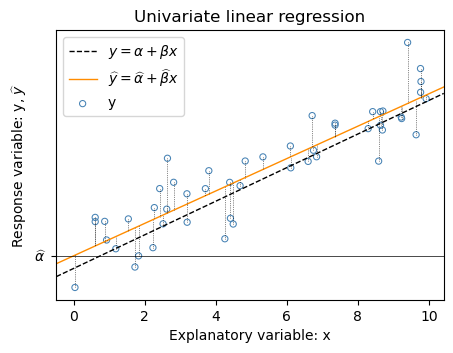

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3.5))

# Plot true relationship
plt.axline(
    (0.0, alpha), slope=beta, lw=1.0, ls='--', c='black', 
    label=r'$y = \alpha + \beta x$'
)

# Plot regression line
plt.axline(
    (0.0, alpha_hat), slope=beta_hat, lw=1.0, c='darkorange', 
    label=r'$\widehat{y} = \widehat{\alpha} + \widehat{\beta} x$'
)

# Plot raw data
plt.scatter(
    x, y, s=20, color='none', edgecolor='steelblue', alpha=1.0, lw=0.75, label='y'
)

# Plot lines connecting true and predicted values for
# each observation
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], yhat[i]], lw=0.5, ls=':', c='black', alpha=0.9)

# Add annotations
plt.xlabel('Explanatory variable: x')
plt.ylabel(r'Response variable: y, $\widehat{y}$')
plt.axhline(alpha_hat, lw=0.5, c='black')
plt.legend(loc='best')
plt.yticks((alpha_hat,), (r'$\widehat{\alpha}$',))

plt.title('Univariate linear regression')

<div class="alert alert-info">
<h3> Your turn</h3>
<ol>
    <li>Recreate and re-estimate the model for samples of size 10, 50, 100, 1000, and 10000.</li>
    <li>Print the estimated values of α and β. Can you say something about the deviation from the true values as the sample size increases?</li>
</ol>
</div>

***
### Training and test samples

- ML mostly deals with prediction
- Estimate model on **training sample**
- Evaluate prediction on **test sample**
- Avoids **overfitting** on training sample

#### Example: Ames housing data

##### Step 1: Load and pre-process data

In [ ]:
# Use local data/ directory
DATA_PATH = '../../data'

# Load data directly from GitHub
# DATA_PATH = 'https://raw.githubusercontent.com/richardfoltyn/FIE463-V25/main/data'

In [ ]:
import pandas as pd

file = f'{DATA_PATH}/ames_houses.csv'
df = pd.read_csv(file)

# List columns present in DataFrame
df.info(show_counts=True)

- Target variable `SalePrice` (in thousand USD)
- Explanatory variable `LivingArea` (in m²)
- Drop outliers with living area above 350m²

#### Step 2: Train-test split

- Use [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - Specify `test_size` or `train_size`
    - Set `random_state` for reproducibility

#### Step 3: Estimate model on training sample

- Linear model:
    $$
    SalePrice_i = \alpha + \beta \cdot LivingArea_i + \epsilon_i
    $$

#### Step 4: Plot sample & fitted relationship

In [ ]:
plt.subplots(figsize=(5, 3.5))

# Plot regression line
plt.axline((0.0, intercept), slope=slope, lw=1.5, c='black', 
    label=r'$\widehat{y} = \widehat{\alpha} + \widehat{\beta} x$')

# Plot training data
plt.scatter(X_train, y_train, s=15, color='none', edgecolor='steelblue', 
    alpha=0.8, lw=0.5, label=r'$y_{train}$')

# Plot test data
plt.scatter(X_test, y_test, s=20, color='none', edgecolor='darkorange', 
    alpha=1.0, lw=0.5, label=r'$y_{test}$')

# Add annotations
plt.xlabel('Living area in $m^2$')
plt.ylabel(r'Sales price in thousand $')
plt.title('Fitted univariate linear regression')
plt.legend(loc='best')


#### Step 5: Compute and plot prediction errors on test sample

- Prediction errors:
$$
\epsilon_i = y_i - \widehat{y}_i = y_i - \widehat{\alpha} - \widehat{\beta} x_i
$$

In [ ]:
plt.figure(figsize=(5, 3.5))

# Scatter plot of prediction errors
plt.scatter(X_test, error, s=20, color='none', edgecolor='red', alpha=1.0, lw=0.75)

# Add annotations
plt.xlabel('Living area in $m^2$')
plt.ylabel(r'Thousand $')
plt.title('Prediction errors in test sample')
plt.axhline(0.0, lw=0.75, ls='--', c='black')

***
## Multivariate linear regression


### Data with several explanatory variables

$$
y_i = \mathbf{x}_i'\mathbf{\beta} + \epsilon_i
$$

- Regressors are now given as **vector** $\mathbf{x}$
- Coefficient **vector** $\bm\beta$ to be estimated

***
#### Example: Ames housing data

- Target variable `SalePrice` (in thousand USD)
- Explanatory variables `LivingArea` (in m²), `LotArea` (in m²)

##### Step 1: Load and pre-process data

In [ ]:
import pandas as pd

def load_ames_data(features, target):
    """
    Load Ames housing data from CSV file and select features and target variable
    """

    # Load data from CSV file
    file = f'{DATA_PATH}/ames_houses.csv'
    df = pd.read_csv(file)

    # Drop any missing obs in selected columns
    columns = features + [target]
    df = df.dropna(subset=columns)

    # Select features and target variable
    X = df[features]
    y = df[target]

    return X, y

- Check for outliers using scatter plot
- Drop observations with living area above 350m² or lot area above 5,000m²

##### Step 2: Train-test split

##### Step 3: Fit the model

- Multivariate linear model:
    $$
    SalePrice_i = \alpha + \beta_0 LivingArea_i + \beta_1 LotArea_i + \epsilon_i
    $$

##### Step 4: Plot prediction errors on test sample

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, errors, s=20, lw=0.75, color='none', edgecolor='red')
plt.axhline(0.0, lw=0.75, ls='--', c='black')
plt.title('Prediction errors in test sample')
plt.xlabel(r'$y_{test}$')
plt.ylabel('Thousand $')

***
### Polynomial features

- Example: Linear model with cubic polynomial in $x$ as explanatory variable:
    $$
    y_i = \alpha + \beta_0 x_i + \beta_1 x_i^2 + \beta_2 x_i^3 + \epsilon_i
    $$

#### Example: Ames housing data with interactions

- Polynomials with interactions of $x$ and $z$:
    $$
    p(x,z) = \beta_0 + \beta_1 x + \beta_2 z + \beta_3 x^2 + \beta_4 x \cdot z + \beta_5 z^2
    $$
    - $x$: `LivingArea`
    - $z$: `LotArea`
- Model given by
    $$
    SalePrice_i = p(LivingArea_i, LotArea_i) + \epsilon_i
    $$

##### Step 1: Create polynomial features

- Create with [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)
- Pass `include_bias=True` to include intercept (constant)
- Exponents stored in `powers_` attribute

##### Step 2: Fit model
- If polynomial has constant, fit linear model with `fit_intercept=False`

##### Step 3: Plot prediction errors on test sample

In [ ]:
plt.scatter(y_test, errors, s=20, lw=0.75, color='none', edgecolor='red')
plt.axhline(0.0, lw=0.75, ls='--', c='black')
plt.xlabel(r'$y_{test}$')
plt.ylabel(r'Thousand $')
plt.title('Prediction errors in test sample')

***
### Using scikit-learn pipelines

- Manually preprocessing variables is error prone 
- Can be automated using **pipelines**
- Two equivalent alternatives to create pipelines:
    1. Create an instance of the 
        [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) class
    2. Use the 
        [`make_pipeline()`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) convenience function

    Pipeline names can be accessed using `named_steps` attribute

#### Step 1: Load and pre-process Ames housing data

In [ ]:
# Load Ames housing data
features = ['LivingArea', 'LotArea']
target = 'SalePrice'

X, y = load_ames_data(features, target)

#### Step 2: Create pipeline

- Combine polynomial feature creation and estimation

#### Step 3: Fit model using pipeline

#### Step 4: Plot prediction errors on test sample

In [ ]:
plt.scatter(y_test, errors, s=20, lw=0.75, color='none', edgecolor='red')
plt.axhline(0.0, lw=0.75, ls='--', c='black')
plt.xlabel(r'$y_{test}$')
plt.ylabel(r'Thousand $')
plt.title('Prediction errors in test sample')

***
### Evaluating the model fit

- Need metric (score) to evaluate model fit
- **Mean squared error (MSE):**
    $$
    MSE = \frac{1}{N} \sum_{i=1}^N \bigl(y_i - \widehat{y}_i\bigr)^2
    $$
- **Root mean squared error (RMSE)**:
    $$
    RMSE = \sqrt{MSE} = \sqrt{\frac{1}{N} \sum_{i=1}^N \bigl(y_i - \widehat{y}_i\bigr)^2}
    $$
- **Coefficients of determination ($R^2$)**: bounded within $[0,1]$ on training sample
    $$
    R^2 = 1 - \frac{MSE}{\widehat{Var}(y)}
    $$

Convenience functions in `scikit-learn`:

-   [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error)
-   [`root_mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html) for the RMSE; and
-   [`r2_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score) for the $R^2$.

***
## Optimizing hyperparameters with cross-validation

### Outline of hyperparameter tuning

- Hyperparameters: additional parameters that are **not** estimated, e.g., polynomial degree used earlier
- How do we find optimal values for such parameters?
    1. Estimate model for different values of hyperparameters
    2. Pick best-performing model

![CV split](cv_split.svg)

***
### Example: Tuning of the polynomial degree

- Same setting as earlier:
    $$
    p(x,z) = \beta_0 + \beta_1 x + \beta_2 z + \beta_3 x^2 + \beta_4 x \cdot z + \beta_5 z^2
    $$
    - $x$: `LivingArea`
    - $z$: `LotArea`

#### Step 1: Load and pre-process Ames housing data

In [ ]:
# Load Ames housing data
features = ['LivingArea', 'LotArea']
target = 'SalePrice'

X, y = load_ames_data(features, target)

#### Step 2: Perform cross-validation
- Find best polynomial degree $d = 0,\dots,5$ using K-fold CV with 10 folds
- Use [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) to split sample

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error

degrees = np.arange(6)

for d in degrees:

    # 1. Create pipeline with polynomial features and linear regression


    # Create 10 folds
    folds = KFold(n_splits=10)

    # Iterate through all combinations of training/test data
    for itrain, itest in folds.split(X, y):

        # Extract training data for this split
        X_train = X.iloc[itrain]
        y_train = y.iloc[itrain]

        # Extract test (or validation) data for this split
        X_test = X.iloc[itest]
        y_test = y.iloc[itest]

        # 2. Fit model on training data for given degree

        # 3. Predict response on train and test data

        # 4. Compute RMSE as model fit measure

        # 5. Store RMSE for current split

    # 6. Store average MSE for current polynomial degree


#### Step 3: Find hyperparameter with lowest RMSE

#### Step 4: Plot validation curve

In [ ]:
plt.plot(degrees, rmse_train_mean, c='black', marker='x', ms=4, alpha=0.7, label='Training')
plt.plot(degrees, rmse_test_mean, c='steelblue', marker='o', ms=4, label='Validation')
plt.xlabel('Polynomial degree')
plt.ylabel('Cross-validated RMSE')
plt.xticks(degrees)
plt.axvline(imin, ls=':', lw=0.75, c='black')
plt.title('Validation curve')
plt.legend()

***
### Automating cross-validation

#### Automatically computing scores on all folds

- Helper function [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html):
    - Select number of folds: `cv=10`
    - Select metric: `scoring='neg_root_mean_squared_error'`
    - List of available metrics (scores): `sklearn.metrics.get_scorer_names()`
        or [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

degrees = np.arange(5)

rmse_mean = []
rmse_std = []

for d in degrees:

    # Create pipeline to transform and fit the model. Pipeline depends
    # on polynomial degree!
    if d == 0:
        # Intercept-only model
        pipe = make_pipeline(
            PolynomialFeatures(degree=d, include_bias=True),
            LinearRegression(fit_intercept=False),
        )
    else:
        # Model with polynomial terms: need to standardize features for 
        # numerical stability
        pipe = make_pipeline(
            PolynomialFeatures(degree=d, include_bias=False),
            StandardScaler(),
            LinearRegression(fit_intercept=True),
        )

    # ADD CALL TO cross_val_score HERE

    # Function returns NEGATIVE RMSE, correct this here!
    rmse_mean.append(np.mean(-score))
    
# Convert to NumPy array
rmse_mean = np.array(rmse_mean)

***
#### Automatically computing the validation curve

- Even more automated: [`validation_curve()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html)
- Specify parameter to tune, parameter range, and scoring metric
- `validation_curve()` returns scores for training and tests sets for all folds

In [ ]:
from sklearn.model_selection import validation_curve

# Candidate polynomial degrees (ignore intercept-only model)
degrees = np.arange(1, 6)

# 1. Create estimator pipeline with hyperparameter to tune

# 2. Call validation_curve()

# 3. Average scoring metric across all folds

In [ ]:
# Compute mean for each degree (scores returned by function are 
# NEGATIVE RMSEs)
rmse_train_mean = np.mean(-train_scores, axis=1)
rmse_test_mean = np.mean(-test_scores, axis=1)

In [ ]:
plt.plot(degrees, rmse_train_mean, c='black', marker='x', ms=4, alpha=0.7, label='Training')
plt.plot(degrees, rmse_test_mean, c='steelblue', marker='o', ms=4, label='Validation')
plt.xlabel('Polynomial degree')
plt.ylabel('Cross-validated RMSE')
plt.xticks(degrees)
plt.axvline(imin, ls=':', lw=0.75, c='black')
plt.title('Validation curve')
plt.legend()

***
### Advanced pipelines and cross-validation: Principal component regression (PCR)

- Use [Principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)
    to address overfitting and multicollinearity


#### Step 1: Load and pre-process Ames housing data

In [ ]:
# Load Ames data with additional features
features = ['LivingArea', 'LotArea', 'YearBuilt', 'OverallQuality']
target = 'SalePrice'

X, y = load_ames_data(features, target)

#### Step 2: Create estimator pipeline & fit model

- Implemented in [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
- PCA is sensitive to scaling, need to apply `StandardScaler` first!

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# ADD estimator pipeline with 4 steps: polynomial features, standardization,
# PCA, linear regression


#### Step 3: Report number of principal components used

In [ ]:
# Extract fraction of variance explained by each principal component.
# Note that the name of the pipeline step is the one assigned when creating the 
# pipeline.
var_expl = pipe_pcr.named_steps['pca'].explained_variance_ratio_
var_expl

# Use pandas plotting functions to create bar plot
pd.Series(var_expl, index=[f'PC{i+1}' for i in range(len(var_expl))]).plot.bar(
    ylabel='Fraction of variance', title='PCA explained variance', rot=0
)

#### Step 4: Cross-validation for PCR

- Two hyperparameters: 

    1.  Maximum polynomial degree for feature creation
    2.  Number of principal components to use (or explained fraction of variance)

-  Use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to run cross-validation on hyperparameter grid
-   Parameters and values are specified using `param_grid` argument (dictionary)
-   Results stored in `best_params_` and `best_score_` attributes

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define grid of hyperparameters
param_grid = {
    'poly__degree': np.arange(1, 6),
    'pca__n_components': np.linspace(0.9, 0.999999, 20),
}

# Create GridSearchCV object
pcr_cv = GridSearchCV(
    estimator=pipe_pcr,                     # Estimator pipeline
    param_grid=param_grid,                  # Grid of hyperparameters
    scoring='neg_root_mean_squared_error',  # Scoring criterion
    cv=10,                                  # Number of folds for CV
    n_jobs=-1,                              # Use all available CPU cores
    refit=True                              # Refit model with best hyperparameters
)

# Run grid search
pcr_cv.fit(X, y)